# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [5]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
path = 'C:\\Users\\ualbertin\\Documents\\Springboard\\Capstone1-SkiArea'
os.chdir(path) 
os.listdir()

['.ipynb_checkpoints',
 'data',
 'figures',
 'GuidedCapstoneStep3HL.ipynb',
 'GuidedCapstoneStep4 and step5HL.ipynb',
 'GuidedCapstoneStep6HL.ipynb',
 'models',
 'Nandi_GuidedCapstone2.ipynb',
 'step3_output.csv',
 'updated_ski_data.csv']

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df=pd.read_csv('data/step3_output.csv')
#create dummy variables for state, which is a non-numeric column
df = pd.concat([df.drop(['state'], axis=1), pd.get_dummies(df.state)], axis=1) # select state column to drop
df2 = df.iloc[:, 0:26] #dropping states
# Declare an explanatory variable, called X2 ,and assign it the result of dropping 'state', Name' and 'AdultWeekend' from the df
X3 = df2.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen','summit_elev','base_elev'], axis=1)
#X3 = df2.drop(['Name','AdultWeekend','summit_elev','base_elev'], axis=1)
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y3 = df2.AdultWeekend 
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X3 
scaler = StandardScaler().fit(X3)
# Declare a variable called X2_scaled, and assign it the result of calling the transform() method with parameter X3 
X3_scaled=scaler.transform(X3)
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y3 = y3.ravel()
# Call the train_test_split() function with the first two parameters set to X3_scaled and y3
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.25, random_state=1)
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(X3_train,y3_train)#create the model
y3_pred = model3.predict(X3_test)#test against the testing y values
ev3=explained_variance_score(y3_test,y3_pred)
mae3=mean_absolute_error(y3_test,y3_pred)
print('explained variance = ' + str(ev3))
print('mean absolute error = ' + str(mae3))
print(lm3.intercept_)

explained variance = 0.397373292627901
mean absolute error = 13.989265818537808
64.26855831385079


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [14]:
BM = df2[df2['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen','summit_elev','base_elev'], axis=1) 
BM

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,yearsOpen,averageSnowfall,NightSkiing_ac,clusters
151,2353,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,72.0,333.0,600.0,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [13]:
BM_scaled = scaler.transform(BM)
BM_scaled

array([[ 1.20196524, -0.30893969, -0.05513178, -0.2840776 ,  0.90289472,
         0.81409101,  2.78349171, -1.01161941,  0.18418936,  0.99023179,
         1.23415417,  0.63979114,  1.62949472,  1.25209972,  1.75663992,
         0.07647692,  1.10855403,  5.81966027,  1.69650476]])

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [17]:
yBM = df2[df2['Name'].str.contains('Big Mountain')].AdultWeekend 
yBM = yBM.ravel()
ypred = model3.predict(BM_scaled)
# Predicted price Adult Weekend
ypred

array([92.76734044])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [51]:
yBM

array([81.])

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

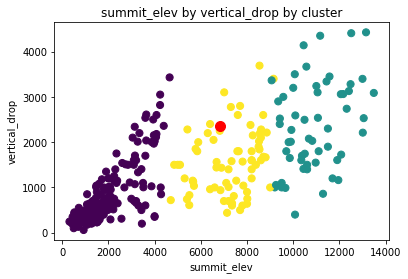

In [52]:
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/Summit_elev-vs-vertical_drop.png',bbox_inches='tight')

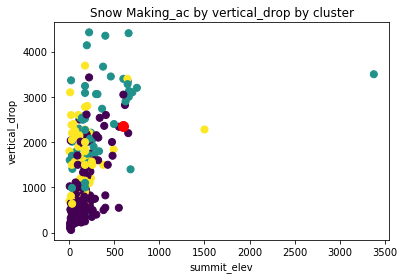

In [53]:
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['Snow Making_ac'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['Snow Making_ac'], ac['vertical_drop'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('Snow Making_ac by vertical_drop by cluster')
plt.savefig('figures/Snow_Making_ac-vs-vertical_drop.png',bbox_inches='tight')

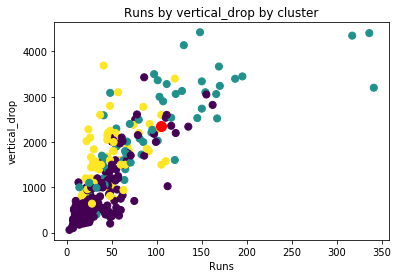

In [54]:
#These two variables are also correlated but not separated out by cluster
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['Runs'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['Runs'], ac['vertical_drop'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('Runs')
plt.ylabel('vertical_drop')
plt.title('Runs by vertical_drop by cluster')
plt.savefig('figures/Runs-vs-vertical_drop.png',bbox_inches='tight')

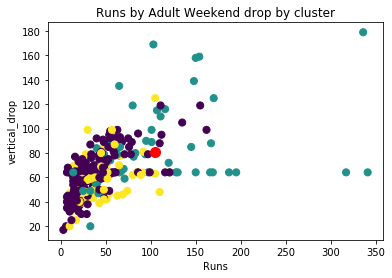

In [55]:
#These two variables are also correlated but not separated out by cluster
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['Runs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['Runs'], ac['AdultWeekend'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('Runs')
plt.ylabel('vertical_drop')
plt.title('Runs by Adult Weekend drop by cluster')
plt.savefig('figures/Runs-vs-Adult_Weekend.png',bbox_inches='tight')

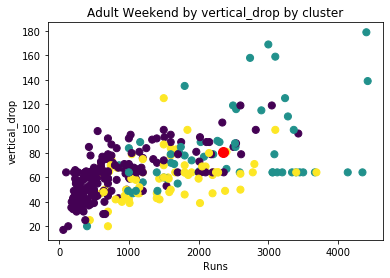

In [56]:
#These two variables are also correlated but not separated out by cluster
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['vertical_drop'], ac['AdultWeekend'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('Runs')
plt.ylabel('vertical_drop')
plt.title('Adult Weekend by vertical_drop by cluster')
plt.savefig('figures/vertical_drop-vs-AdultWeekend.png',bbox_inches='tight')

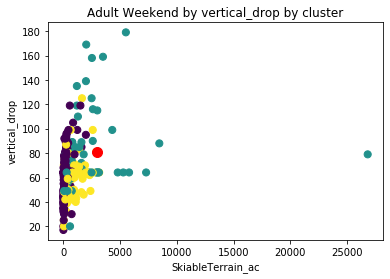

In [57]:
#These two variables are also correlated but it looks like other resorts with similar skiaable terrain charge higher prices
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['SkiableTerrain_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['SkiableTerrain_ac'], ac['AdultWeekend'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('vertical_drop')
plt.title('Adult Weekend by vertical_drop by cluster')
plt.savefig('figures/AdultWeekend-vs-vertical_drop.png',bbox_inches='tight')

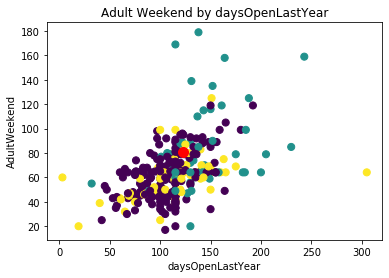

In [58]:
#These two variables are also correlated but it looks like other resorts with similar days open last year charge higher prices
ac=df2[df2['Name'].str.contains('Big Mountain')]
plt.scatter(df['daysOpenLastYear'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['daysOpenLastYear'], ac['AdultWeekend'], c='red', s=100)#Big mountain data falls squarely in the middle
plt.xlabel('daysOpenLastYear')
plt.ylabel('AdultWeekend')
plt.title('Adult Weekend by daysOpenLastYear')
plt.savefig('figures/AdultWeekend-vs-daysOpenLastYear.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [59]:
import pickle
s = pickle.dumps(model3)
from joblib import dump, load
dump(model3, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [60]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
lm_df3 = pd.DataFrame(abs(lm3.coef_), X3.columns, columns=['Coefficient'])
lm_df3.sort_values(by=['Coefficient'], ascending=False).head(19)

,Coefficient
vertical_drop,10.333574
Snow Making_ac,5.660332
clusters,4.629705
quad,3.877485
triple,3.514672
trams,3.400900
fastQuads,2.767894
averageSnowfall,2.405062
surface,2.346793
fastEight,2.303942


In [61]:
#Add performance metrics to the df
lm_df3.at['explained_variance'] = ev3
lm_df3.at['mean_absolute_error'] = mae3
lm_df3

,Coefficient
vertical_drop,10.333574
trams,3.400900
fastEight,2.303942
fastSixes,0.881393
fastQuads,2.767894
quad,3.877485
triple,3.514672
double,0.851252
surface,2.346793
total_chairs,1.891728


In [62]:
# Write dataframe to csv 
lm_df3.to_csv('data/step6_output.csv', index=False)